In [11]:
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import interpolate
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker

starting
loading datfile
[0.5417204258205643, 0.017474846150578226, 0.006843018277645626, 0.008803055761289258, 0.01673223729585271, 0.03550277460676799, 0.09920673246544699]
plotting poemma


/tmp/ipykernel_10287/919489849.py:142: RuntimeWarning: divide by zero encountered in true_divide
  auger_sensitivity = (5 * auger[:, 0] ) / (4.0 * auger[:, 1])


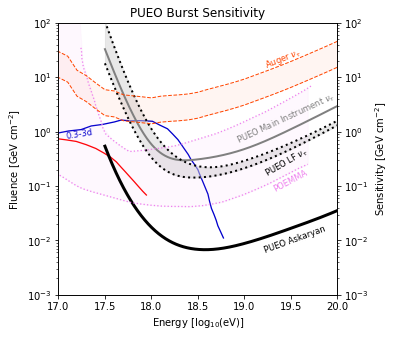

In [12]:
print("starting")
energy = np.logspace(-1,2,10000)
fig, ax = plt.subplots(figsize=(5,5))

logenergy = np.log10(energy*1e18)

ylim=[1e-3, 1e2]

ax.set(title='PUEO Burst Sensitivity',
       xlabel=r"Energy [$\log_{10}(\mathrm{eV})]$",
       ylabel=r"Fluence [GeV cm$^{-2}$]",
       xlim=[17.0, 20.0],
       ylim=ylim,
       yscale="log")

axr = ax.twinx()
axr.set(ylabel=r"Sensitivity [GeV cm$^{-2}$]", yscale="log", ylim=ylim)


print("loading datfile")
pueo_maxAs = np.load('maxAEffs.npy')

logEs = []
sess = []
sessp = []
sessm = []
for i in range(0,len(pueo_maxAs)):
    logE = pueo_maxAs[i][0]
    max_Aeff = pueo_maxAs[i][1]*1e10
    max_Aeff_p = max_Aeff+(pueo_maxAs[i][2]*max_Aeff)
    max_Aeff_m = max_Aeff-(pueo_maxAs[i][3]*max_Aeff)
    ses = ((10.**logE)/1e9)/(4.0*max_Aeff)
    sesp = ((10.**logE)/1e9)/(4.0*max_Aeff_p)
    sesm = ((10.**logE)/1e9)/(4.0*max_Aeff_m)
    #print(logE, sesp, sesm, sesp-sesm)
    sess.append(ses)
    sessp.append(sesp)
    sessm.append(sesm)
    logEs.append(logE)
logEs = np.array(logEs)
    
sess_spline = interpolate.interp1d(logEs, np.log10(sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
sessp_spline = interpolate.interp1d(logEs, sessp, kind='cubic')
sessm_spline = interpolate.interp1d(logEs, sessm, kind='cubic')
#ask_burst_A = 20.*1e10
#ses = (1*10*1e18/1e9)/(4.0*ask_burst_A)
print(sess)
plotEs = np.linspace(17.5,20,1000)
plt.plot(plotEs, 10**sess_spline(plotEs), 'k-', lw=3)
#plt.fill_between(logEs, sessm_spline(logEs), sessp_spline(logEs), color='lightgray', alpha=0.5)
axr.text(19.2, 0.6*1e-2, r"PUEO Askaryan", rotation=20, fontsize='small')

HF_tau = np.loadtxt('Peak_Eff_area_MI_single_ant_SNR0_75.txt', skiprows=1)
HF_tau_sess = []
HF_tau_Es = []
for i in range(0,len(HF_tau)):
    E = HF_tau[i][0]
    max_Aeff = HF_tau[i][1]*1e10
    ses = (E*1e18/1e9)/(4.0*max_Aeff)
    HF_tau_sess.append(ses)
    HF_tau_Es.append(np.log10(E*1e18))

HF_tau_Es = np.array(HF_tau_Es)
HF_tau_spline = interpolate.interp1d(HF_tau_Es, np.log10(HF_tau_sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
#plt.plot(HF_tau_Es, HF_tau_sess, color='gray', lw=2)
plt.plot(plotEs, 10**HF_tau_spline(plotEs), color='gray', lw=2)
axr.text(18.9, 0.6, r"PUEO Main Instrument $\nu_{\tau}$", rotation=25, fontsize='small', color='gray')


LF_tau3 = np.loadtxt('Peak_Eff_area_LF_single_ant_SNR1_3.txt', skiprows=1)
LF_tau3_sess = []
LF_tau3_Es = []
for i in range(0,len(LF_tau3)):
    E = LF_tau3[i][0]
    max_Aeff = LF_tau3[i][1]*1e10
    ses = (E*1e18/1e9)/(4.0*max_Aeff)
    LF_tau3_sess.append(ses)
    LF_tau3_Es.append(np.log10(E*1e18))
LF_tau3_Es = np.array(LF_tau3_Es)
    
#plt.plot(LF_tau3_Es, LF_tau3_sess, color='k', linestyle=':', lw=2)
LF_tau3_spline = interpolate.interp1d(LF_tau3_Es, np.log10(LF_tau3_sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
plt.plot(plotEs, 10**LF_tau3_spline(plotEs), color='k', linestyle=':', lw=2)

LF_tau9 = np.loadtxt('Peak_Eff_area_LF_single_ant_SNR1_9.txt', skiprows=1)
LF_tau9_sess = []
LF_tau9_Es = []
for i in range(0,len(LF_tau9)):
    E = LF_tau9[i][0]
    max_Aeff = LF_tau9[i][1]*1e10
    ses = (E*1e18/1e9)/(4.0*max_Aeff)
    LF_tau9_sess.append(ses)
    LF_tau9_Es.append(np.log10(E*1e18))
LF_tau9_Es = np.array(LF_tau9_Es)

#plt.plot(LF_tau9_Es, LF_tau9_sess, color='k', linestyle=':', lw=2)
LF_tau9_spline = interpolate.interp1d(LF_tau9_Es, np.log10(LF_tau9_sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
plt.plot(plotEs, 10**LF_tau9_spline(plotEs), color='k', linestyle=':', lw=2)

plt.fill_between(plotEs, 10**LF_tau3_spline(plotEs), 10**LF_tau9_spline(plotEs), color='lightgray', alpha=0.5)
axr.text(19.2, 0.15, r"PUEO LF $\nu_{\tau}$", rotation=30, fontsize='small', color='k')


#LF_low = np.loadtxt('Pueo_LF_low.csv', delimiter=',')
#tLF_low = np.transpose(LF_low)
#LF_lowx = tLF_low[0]
#LF_lowy = tLF_low[1]
#LF_lowspline = interpolate.interp1d(LF_lowx, LF_lowy, kind='linear', bounds_error=False, fill_value='extrapolate')
#LF_xvals = np.linspace(17, 20, 100)
#LF_yvals_low = LF_lowspline(LF_xvals)
#plt.plot(LF_xvals, LF_yvals_low, color='gray')

#LF_high = np.loadtxt('Pueo_LF_high.csv', delimiter=',')
#tLF_high = np.transpose(LF_high)
#LF_highx = tLF_high[0]
#LF_highy = tLF_high[1]
#LF_highspline = interpolate.interp1d(LF_highx, LF_highy, kind='linear', bounds_error=False, fill_value='extrapolate')
#LF_xvals = np.linspace(17, 20, 100)
#LF_yvals_high = LF_highspline(LF_xvals)
#plt.plot(LF_xvals, LF_yvals_high, color='gray')

#plt.fill_between(LF_xvals, LF_yvals_low, LF_yvals_high, color='lightgray', alpha=0.5)
#axr.text(19.45, 0.45*1e0, r"PUEO $\nu_\tau$", rotation=30, fontsize='small')

print("plotting poemma")

POEMMA_bottom = np.loadtxt("POEMMA_bottom_short.csv", delimiter=",")
POEMMA_top = np.loadtxt("POEMMA_top_short.csv", delimiter=",")
# convert to single-event sensitivity
POEMMA_bottom[:, 1] /= 2.44
POEMMA_top[:, 1] /= 2.44
axr.plot(POEMMA_bottom[:, 0] + 9.0, POEMMA_bottom[:, 1], c="violet", lw=1.3, ls=":")
axr.plot(POEMMA_top[:, 0] + 9.0, POEMMA_top[:, 1], c="violet", lw=1.3, ls=":")
Ptop = 10.0 ** interpolate.interp1d(POEMMA_top[:, 0], np.log10(POEMMA_top[:, 1]), kind="cubic", fill_value="extrapolate")(POEMMA_bottom[:, 0])
Ptop[POEMMA_bottom[:, 0] < POEMMA_top[0, 0]] = 1e3
axr.fill_between(POEMMA_bottom[:, 0] + 9.0, POEMMA_bottom[:, 1], Ptop, color="violet", alpha=0.05)
ax.text(19.3, 0.08, 'POEMMA', color="violet", size="small", rotation=28)

FC=1
auger = np.loadtxt("auger_short_duration_area.txt")
# auger[:, 1] /= 
auger_sensitivity = (5 * auger[:, 0] ) / (4.0 * auger[:, 1])
axr.plot(np.log10(auger[2:, 0]*1e9), auger_sensitivity[2:], c="orangered", lw=1.0, ls="--")
#axr.plot(np.log10(auger[35:, 0]*1e9), auger_sensitivity[35:], c="orangered", lw=1.0, ls="--")
axr.plot(np.log10(auger[2:, 0]*1e9), 3.*auger_sensitivity[2:], c="orangered", lw=1.0, ls="--")
axr.fill_between(np.log10(auger[2:, 0]*1e9), auger_sensitivity[2:], 3.*auger_sensitivity[2:], color="orangered", lw=0., alpha=0.05)
ax.text(19.2, 1.5*10, r"Auger $\nu_\tau$", fontsize="small", rotation=22, color="orangered")

#### MAGNETARS
# magnetar30 = np.loadtxt("magnetar_3day_30day.csv", delimiter=',')
magnetar3 = np.loadtxt("magnetar_0.3day_3day.csv", delimiter=',')
# m3 = 10.0 ** interp1d(np.log10(magnetar3[:, 0]), np.log10(magnetar3[:, 1]), kind="quadratic", fill_value="extrapolate")(np.log10(magnetar30[:, 0]))
# magmax = np.argmin(np.abs(np.log10(magnetar30[:, 0]) - 18.3))
ax.plot(np.log10(magnetar3[:, 0])+0.02, magnetar3[:, 1], label="NS-NS Merger (Fang 2017)", lw=1.3, c="mediumblue")
#ax.fill_between(np.log10(magnetar3[:, 0])+0.02, 0.1*magnetar3[:, 1], magnetar3[:, 1], lw=0., color="mediumblue", alpha=0.15)
# ax.plot(np.log10(magnetar30[0:magmax, 0]), m3[0:magmax], lw=1.3, c="mediumblue")
# ax.fill_between(np.log10(magnetar30[:magmax-1, 0]), m3[:magmax-1], magnetar30[:magmax-1, 1], color="mediumblue", alpha=0.2)
ax.text(17.07, 0.73, r"0.3-3d", fontsize="small", rotation=9, color="mediumblue")
# ax.text(17.05, 3.15, r"3-30d", fontsize="xx-small", rotation=17, color="mediumblue")

# ### sGRB KMMK
KMMK = np.loadtxt("KMMK_sGRB.csv", delimiter=',')
ax.plot(KMMK[:, 0] + 9.0, KMMK[:, 1], lw=1.3, c="red", label="sGRB (KMMK 2017)")
#ax.fill_between(KMMK[:, 0] + 9.0, 0.1 * KMMK[:, 1], KMMK[:, 1], color="red", alpha=0.15, lw=0.)

plt.savefig('short_transients.pdf', bbox_inches='tight')

starting
loading datfile
17.5 0.5300404148040458 0.5446361452092204 -0.01459573040517459
18.0 0.009138978455998788 0.03019999884200852 -0.02106102038600973
18.5 0.0008887318336428409 -0.0026203059522957287 0.0035090377859385694
19.0 0.003284354398474367 -0.013877925717810049 0.017162280116284415
19.5 0.01571195512420997 0.01767472776082627 -0.001962772636616303
20.0 0.03330264409551484 0.037786032584105816 -0.004483388488590978
20.5 0.09320582363117069 0.10531791434722311 -0.012112090716052418
[0.5417204258205643, 0.017474846150578226, 0.006843018277645626, 0.008803055761289258, 0.01673223729585271, 0.03550277460676799, 0.09920673246544699]
plotting poemma


/tmp/ipykernel_10287/2507051550.py:142: RuntimeWarning: divide by zero encountered in true_divide
  auger_sensitivity = (FC * auger[:, 0] ) / (4.0 * auger[:, 1])


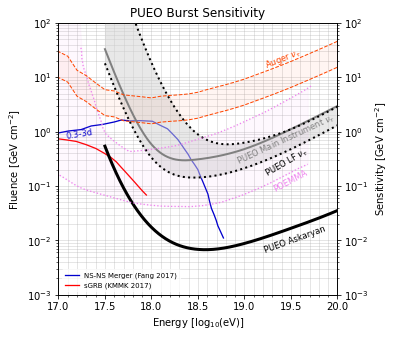

In [13]:
print("starting")
energy = np.logspace(-1,2,10000)
fig, ax = plt.subplots(figsize=(5,5))

logenergy = np.log10(energy*1e18)

ylim=[1e-3, 1e2]

ax.set(title='PUEO Burst Sensitivity',
       xlabel=r"Energy [$\log_{10}(\mathrm{eV})]$",
       ylabel=r"Fluence [GeV cm$^{-2}$]",
       xlim=[17.0, 20.0],
       ylim=ylim,
       yscale="log")

axr = ax.twinx()
axr.set(ylabel=r"Sensitivity [GeV cm$^{-2}$]", yscale="log", ylim=ylim)


print("loading datfile")
pueo_maxAs = np.load('maxAEffs.npy')

logEs = []
sess = []
sessp = []
sessm = []
for i in range(0,len(pueo_maxAs)):
    logE = pueo_maxAs[i][0]
    max_Aeff = pueo_maxAs[i][1]*1e10
    max_Aeff_p = max_Aeff+(pueo_maxAs[i][2]*max_Aeff)
    max_Aeff_m = max_Aeff-(pueo_maxAs[i][3]*max_Aeff)
    ses = ((10.**logE)/1e9)/(4.0*max_Aeff)
    sesp = ((10.**logE)/1e9)/(4.0*max_Aeff_p)
    sesm = ((10.**logE)/1e9)/(4.0*max_Aeff_m)
    print(logE, sesp, sesm, sesp-sesm)
    sess.append(ses)
    sessp.append(sesp)
    sessm.append(sesm)
    logEs.append(logE)
logEs = np.array(logEs)
    
sess_spline = interpolate.interp1d(logEs, np.log10(sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
sessp_spline = interpolate.interp1d(logEs, sessp, kind='cubic')
sessm_spline = interpolate.interp1d(logEs, sessm, kind='cubic')
#ask_burst_A = 20.*1e10
#ses = (1*10*1e18/1e9)/(4.0*ask_burst_A)
print(sess)
plotEs = np.linspace(17.5,20,1000)
plt.plot(plotEs, 10**sess_spline(plotEs), 'k-', lw=3)
#plt.fill_between(logEs, sessm_spline(logEs), sessp_spline(logEs), color='lightgray', alpha=0.5)
axr.text(19.2, 0.6*1e-2, r"PUEO Askaryan", rotation=20, fontsize='small')

HF_tau = np.loadtxt('Peak_Eff_area_MI_single_ant_SNR0_75.txt', skiprows=1)
HF_tau_sess = []
HF_tau_Es = []
for i in range(0,len(HF_tau)):
    E = HF_tau[i][0]
    max_Aeff = HF_tau[i][1]*1e10
    ses = (E*1e18/1e9)/(4.0*max_Aeff)
    HF_tau_sess.append(ses)
    HF_tau_Es.append(np.log10(E*1e18))

HF_tau_Es = np.array(HF_tau_Es)
HF_tau_spline = interpolate.interp1d(HF_tau_Es, np.log10(HF_tau_sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
#plt.plot(HF_tau_Es, HF_tau_sess, color='gray', lw=2)
plt.plot(plotEs, 10**HF_tau_spline(plotEs), color='gray', lw=2)
axr.text(18.9, 0.25, r"PUEO Main Instrument $\nu_{\tau}$", rotation=25, fontsize='small', color='gray')


LF_tau3 = np.loadtxt('Peak_Eff_area_LF_single_ant_SNR1_3.txt', skiprows=1)
LF_tau3_sess = []
LF_tau3_Es = []
for i in range(0,len(LF_tau3)):
    E = LF_tau3[i][0]
    max_Aeff = LF_tau3[i][1]*1e10
    ses = (E*1e18/1e9)/(4.0*max_Aeff)
    LF_tau3_sess.append(ses)
    LF_tau3_Es.append(np.log10(E*1e18))
LF_tau3_Es = np.array(LF_tau3_Es)
    
#plt.plot(LF_tau3_Es, LF_tau3_sess, color='k', linestyle=':', lw=2)
LF_tau3_spline = interpolate.interp1d(LF_tau3_Es, np.log10(LF_tau3_sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
plt.plot(plotEs, 10**LF_tau3_spline(plotEs), color='k', linestyle=':', lw=2)

LF_tau9 = np.loadtxt('Peak_Eff_area_LF_single_ant_SNR4_3.txt', skiprows=1)
LF_tau9_sess = []
LF_tau9_Es = []
for i in range(0,len(LF_tau9)):
    E = LF_tau9[i][0]
    max_Aeff = LF_tau9[i][1]*1e10
    ses = (E*1e18/1e9)/(4.0*max_Aeff)
    LF_tau9_sess.append(ses)
    LF_tau9_Es.append(np.log10(E*1e18))
LF_tau9_Es = np.array(LF_tau9_Es)

#plt.plot(LF_tau9_Es, LF_tau9_sess, color='k', linestyle=':', lw=2)
LF_tau9_spline = interpolate.interp1d(LF_tau9_Es, np.log10(LF_tau9_sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
plt.plot(plotEs, 10**LF_tau9_spline(plotEs), color='k', linestyle=':', lw=2)

plt.fill_between(plotEs, 10**LF_tau3_spline(plotEs), 10**LF_tau9_spline(plotEs), color='lightgray', alpha=0.5)
axr.text(19.2, 0.15, r"PUEO LF $\nu_{\tau}$", rotation=30, fontsize='small', color='k')


#LF_low = np.loadtxt('Pueo_LF_low.csv', delimiter=',')
#tLF_low = np.transpose(LF_low)
#LF_lowx = tLF_low[0]
#LF_lowy = tLF_low[1]
#LF_lowspline = interpolate.interp1d(LF_lowx, LF_lowy, kind='linear', bounds_error=False, fill_value='extrapolate')
#LF_xvals = np.linspace(17, 20, 100)
#LF_yvals_low = LF_lowspline(LF_xvals)
#plt.plot(LF_xvals, LF_yvals_low, color='gray')

#LF_high = np.loadtxt('Pueo_LF_high.csv', delimiter=',')
#tLF_high = np.transpose(LF_high)
#LF_highx = tLF_high[0]
#LF_highy = tLF_high[1]
#LF_highspline = interpolate.interp1d(LF_highx, LF_highy, kind='linear', bounds_error=False, fill_value='extrapolate')
#LF_xvals = np.linspace(17, 20, 100)
#LF_yvals_high = LF_highspline(LF_xvals)
#plt.plot(LF_xvals, LF_yvals_high, color='gray')

#plt.fill_between(LF_xvals, LF_yvals_low, LF_yvals_high, color='lightgray', alpha=0.5)
#axr.text(19.45, 0.45*1e0, r"PUEO $\nu_\tau$", rotation=30, fontsize='small')

print("plotting poemma")

POEMMA_bottom = np.loadtxt("POEMMA_bottom_short.csv", delimiter=",")
POEMMA_top = np.loadtxt("POEMMA_top_short.csv", delimiter=",")
# convert to single-event sensitivity
POEMMA_bottom[:, 1] /= 2.44
POEMMA_top[:, 1] /= 2.44
axr.plot(POEMMA_bottom[:, 0] + 9.0, POEMMA_bottom[:, 1], c="violet", lw=1.3, ls=":")
axr.plot(POEMMA_top[:, 0] + 9.0, POEMMA_top[:, 1], c="violet", lw=1.3, ls=":")
Ptop = 10.0 ** interpolate.interp1d(POEMMA_top[:, 0], np.log10(POEMMA_top[:, 1]), kind="cubic", fill_value="extrapolate")(POEMMA_bottom[:, 0])
Ptop[POEMMA_bottom[:, 0] < POEMMA_top[0, 0]] = 1e3
axr.fill_between(POEMMA_bottom[:, 0] + 9.0, POEMMA_bottom[:, 1], Ptop, color="violet", alpha=0.05)
ax.text(19.3, 0.08, 'POEMMA', color="violet", size="small", rotation=28)

FC=5
auger = np.loadtxt("auger_short_duration_area.txt")
# auger[:, 1] /= 
auger_sensitivity = (FC * auger[:, 0] ) / (4.0 * auger[:, 1])
axr.plot(np.log10(auger[2:, 0]*1e9), auger_sensitivity[2:], c="orangered", lw=1.0, ls="--")
#axr.plot(np.log10(auger[35:, 0]*1e9), auger_sensitivity[35:], c="orangered", lw=1.0, ls="--")
axr.plot(np.log10(auger[2:, 0]*1e9), 3.*auger_sensitivity[2:], c="orangered", lw=1.0, ls="--")
axr.fill_between(np.log10(auger[2:, 0]*1e9), auger_sensitivity[2:], 3.*auger_sensitivity[2:], color="orangered", lw=0., alpha=0.05)
ax.text(19.2, 1.5*10, r"Auger $\nu_\tau$", fontsize="small", rotation=22, color="orangered")

#### MAGNETARS
# magnetar30 = np.loadtxt("magnetar_3day_30day.csv", delimiter=',')
magnetar3 = np.loadtxt("magnetar_0.3day_3day.csv", delimiter=',')
# m3 = 10.0 ** interp1d(np.log10(magnetar3[:, 0]), np.log10(magnetar3[:, 1]), kind="quadratic", fill_value="extrapolate")(np.log10(magnetar30[:, 0]))
# magmax = np.argmin(np.abs(np.log10(magnetar30[:, 0]) - 18.3))
ax.plot(np.log10(magnetar3[:, 0])+0.02, magnetar3[:, 1], label="NS-NS Merger (Fang 2017)", lw=1.3, c="mediumblue")
#ax.fill_between(np.log10(magnetar3[:, 0])+0.02, 0.1*magnetar3[:, 1], magnetar3[:, 1], lw=0., color="mediumblue", alpha=0.15)
# ax.plot(np.log10(magnetar30[0:magmax, 0]), m3[0:magmax], lw=1.3, c="mediumblue")
# ax.fill_between(np.log10(magnetar30[:magmax-1, 0]), m3[:magmax-1], magnetar30[:magmax-1, 1], color="mediumblue", alpha=0.2)
ax.text(17.07, 0.73, r"0.3-3d", fontsize="small", rotation=9, color="mediumblue")
# ax.text(17.05, 3.15, r"3-30d", fontsize="xx-small", rotation=17, color="mediumblue")

# ### sGRB KMMK
KMMK = np.loadtxt("KMMK_sGRB.csv", delimiter=',')
ax.plot(KMMK[:, 0] + 9.0, KMMK[:, 1], lw=1.3, c="red", label="sGRB (KMMK 2017)")
#ax.fill_between(KMMK[:, 0] + 9.0, 0.1 * KMMK[:, 1], KMMK[:, 1], color="red", alpha=0.15, lw=0.)

# and minor ticks
ax.yaxis.set_minor_locator(
    mtick.LogLocator(
        base=10.0,
        subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),
        numticks=20,
    )
)
ax.yaxis.set_minor_formatter(mtick.NullFormatter())
minor_tick = np.arange(17,20,0.1)
ax.set_xticks(minor_tick, minor=True)

ax.grid(which="both", alpha=0.4)



ax.legend(loc="lower left", fontsize="x-small", edgecolor="white", framealpha=0.7)
plt.savefig('short_transients.pdf', bbox_inches='tight')


starting
loading datfile


FileNotFoundError: [Errno 2] No such file or directory: 'max_avgAEffs.npy'

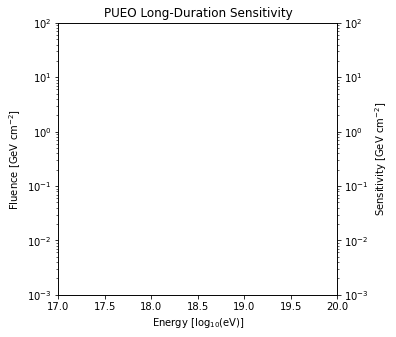

In [14]:
print("starting")
energy = np.logspace(-1,2,10000)
fig, ax = plt.subplots(figsize=(5,5))

logenergy = np.log10(energy*1e18)

ylim=[1e-3, 1e2]

ax.set(title="PUEO Long-Duration Sensitivity",
       xlabel=r"Energy [$\log_{10}(\mathrm{eV})]$",
       ylabel=r"Fluence [GeV cm$^{-2}$]",
       xlim=[17.0, 20.0],
       ylim=ylim,
       yscale="log")

# and create a twin-axis on the right for sensitivity
axr = ax.twinx()
axr.set(ylabel=r"Sensitivity [GeV cm$^{-2}$]", yscale="log", ylim=ylim,)

print("loading datfile")
pueo_maxAs = np.load('max_avgAEffs.npy')
print(pueo_maxAs)

logEs = []
sess = []
sessp = []
sessm = []
for i in range(0,len(pueo_maxAs)):
    logE = pueo_maxAs[i][0]
    max_Aeff = pueo_maxAs[i][1]*1e10
    #max_Aeff_p = max_Aeff+(pueo_maxAs[i][2]*max_Aeff)
    #max_Aeff_m = max_Aeff-(pueo_maxAs[i][3]*max_Aeff)
    ses = ((10.**logE)/1e9)/(4.0*max_Aeff)
    #sesp = ((10.**logE)/1e9)/(4.0*max_Aeff_p)
    #sesm = ((10.**logE)/1e9)/(4.0*max_Aeff_m)
    #print(logE, sesp, sesm, sesp-sesm)
    sess.append(ses)
    #sessp.append(sesp)
    #sessm.append(sesm)
    logEs.append(logE)
logEs = np.array(logEs)
    
sess_spline = interpolate.interp1d(logEs, np.log10(sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
#sessp_spline = interpolate.interp1d(logEs, sessp, kind='cubic')
#sessm_spline = interpolate.interp1d(logEs, sessm, kind='cubic')
#ask_burst_A = 20.*1e10
#ses = (1*10*1e18/1e9)/(4.0*ask_burst_A)
print(sess)
plotEs = np.linspace(17.5,20,1000)
plt.plot(plotEs, 10**sess_spline(plotEs), 'k-', lw=3)
#plt.fill_between(logEs, sessm_spline(logEs), sessp_spline(logEs), color='lightgray', alpha=0.5)
axr.text(19.2, 2.0*1e-2, r"PUEO Askaryan", rotation=20, fontsize='small')

print("loading datfile")
pueo_maxAs = np.load('max_avgAEffs_tau_low.npy')
print(pueo_maxAs)

logEs = []
sess = []
sessp = []
sessm = []
for i in range(0,len(pueo_maxAs)):
    logE = pueo_maxAs[i][0]
    max_Aeff = pueo_maxAs[i][1]*1e10
    #max_Aeff_p = max_Aeff+(pueo_maxAs[i][2]*max_Aeff)
    #max_Aeff_m = max_Aeff-(pueo_maxAs[i][3]*max_Aeff)
    ses = ((10.**logE)/1e9)/(4.0*max_Aeff)
    #sesp = ((10.**logE)/1e9)/(4.0*max_Aeff_p)
    #sesm = ((10.**logE)/1e9)/(4.0*max_Aeff_m)
    #print(logE, sesp, sesm, sesp-sesm)
    sess.append(ses)
    #sessp.append(sesp)
    #sessm.append(sesm)
    logEs.append(logE)
logEs = np.array(logEs)
    
LF_tau3_spline = interpolate.interp1d(logEs, np.log10(sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
#sessp_spline = interpolate.interp1d(logEs, sessp, kind='cubic')
#sessm_spline = interpolate.interp1d(logEs, sessm, kind='cubic')
#ask_burst_A = 20.*1e10
#ses = (1*10*1e18/1e9)/(4.0*ask_burst_A)
print(sess)
plotEs = np.linspace(17.5,20,1000)
plt.plot(plotEs, 10**LF_tau3_spline(plotEs), '-', color='k', lw=2, linestyle=':')
#plt.fill_between(logEs, sessm_spline(logEs), sessp_spline(logEs), color='lightgray', alpha=0.5)
#axr.text(19.2, 3*1e0,  r"PUEO LF $\nu_{\tau}$", rotation=25, fontsize='small', color='gray')


pueo_maxAs = np.load('max_avgAEffs_tau_4_3.npy')
print(pueo_maxAs)

logEs = []
sess = []
sessp = []
sessm = []
for i in range(0,len(pueo_maxAs)):
    logE = pueo_maxAs[i][0]
    max_Aeff = pueo_maxAs[i][1]*1e10
    #max_Aeff_p = max_Aeff+(pueo_maxAs[i][2]*max_Aeff)
    #max_Aeff_m = max_Aeff-(pueo_maxAs[i][3]*max_Aeff)
    ses = ((10.**logE)/1e9)/(4.0*max_Aeff)
    #sesp = ((10.**logE)/1e9)/(4.0*max_Aeff_p)
    #sesm = ((10.**logE)/1e9)/(4.0*max_Aeff_m)
    #print(logE, sesp, sesm, sesp-sesm)
    sess.append(ses)
    #sessp.append(sesp)
    #sessm.append(sesm)
    logEs.append(logE)
logEs = np.array(logEs)
    
LF_tau9_spline = interpolate.interp1d(logEs, np.log10(sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
#sessp_spline = interpolate.interp1d(logEs, sessp, kind='cubic')
#sessm_spline = interpolate.interp1d(logEs, sessm, kind='cubic')
#ask_burst_A = 20.*1e10
#ses = (1*10*1e18/1e9)/(4.0*ask_burst_A)
print(sess)
plotEs = np.linspace(17.5,20,1000)
plt.plot(plotEs, 10**LF_tau9_spline(plotEs), '-', color='k', lw=2, linestyle=':')
#plt.fill_between(logEs, sessm_spline(logEs), sessp_spline(logEs), color='lightgray', alpha=0.5)
#axr.text(19.2, 3*1e0,  r"PUEO LF $\nu_{\tau}$", rotation=25, fontsize='small', color='gray')
plt.fill_between(plotEs, 10**LF_tau3_spline(plotEs), 10**LF_tau9_spline(plotEs), color='lightgray', alpha=0.5)
axr.text(19.2, 1.5*1e0,  r"PUEO LF $\nu_{\tau}$", rotation=25, fontsize='small', color='k')


pueo_maxAs = np.load('max_avgAEffs_tau_MI.npy')
print(pueo_maxAs)

logEs = []
sess = []
sessp = []
sessm = []
for i in range(0,len(pueo_maxAs)):
    logE = pueo_maxAs[i][0]
    max_Aeff = pueo_maxAs[i][1]*1e10
    #max_Aeff_p = max_Aeff+(pueo_maxAs[i][2]*max_Aeff)
    #max_Aeff_m = max_Aeff-(pueo_maxAs[i][3]*max_Aeff)
    ses = ((10.**logE)/1e9)/(4.0*max_Aeff)
    #sesp = ((10.**logE)/1e9)/(4.0*max_Aeff_p)
    #sesm = ((10.**logE)/1e9)/(4.0*max_Aeff_m)
    #print(logE, sesp, sesm, sesp-sesm)
    sess.append(ses)
    #sessp.append(sesp)
    #sessm.append(sesm)
    logEs.append(logE)
logEs = np.array(logEs)
    
LF_tauMI_spline = interpolate.interp1d(logEs, np.log10(sess), kind='cubic', bounds_error=False, fill_value='extrapolate')
#sessp_spline = interpolate.interp1d(logEs, sessp, kind='cubic')
#sessm_spline = interpolate.interp1d(logEs, sessm, kind='cubic')
#ask_burst_A = 20.*1e10
#ses = (1*10*1e18/1e9)/(4.0*ask_burst_A)
print(sess)
plotEs = np.linspace(17.5,20,1000)
plt.plot(plotEs, 10**LF_tauMI_spline(plotEs), color='gray', lw=2, linestyle='-')
#plt.fill_between(logEs, sessm_spline(logEs), sessp_spline(logEs), color='lightgray', alpha=0.5)
axr.text(19.2, 8*1e0,  r"PUEO MI $\nu_{\tau}$", rotation=25, fontsize='small', color='gray')


auger = np.loadtxt("auger_long_duration_avgexp.txt")
auger_A = auger[:, 1] / (24.*60.*60.)
print(auger_A)
auger_A /= 3 # since its only sensitive to tau's
auger_sensitivity = (1. * auger[:, 0] ) / (4.0 * auger_A)
print(auger_sensitivity)
axr.plot(np.log10(auger[2:, 0]*1e9), auger_sensitivity[2:], c="orangered", lw=1.0, ls="--")
axr.plot(np.log10(auger[2:, 0]*1e9), 4.*auger_sensitivity[2:], c="orangered", lw=1.0, ls="--")
axr.fill_between(np.log10(auger[2:, 0]*1e9), auger_sensitivity[2:], 4.*auger_sensitivity[2:], color="orangered", lw=0., alpha=0.05)
ax.text(18.70, 0.83*10, r"Auger $\nu_\tau$", fontsize="xx-small", rotation=20, color="orangered")

#### MAGNETARS
magnetar30 = np.loadtxt("magnetar_3day_30day.csv", delimiter=',')
magnetar3 = np.loadtxt("magnetar_0.3day_3day.csv", delimiter=',')
m3 = 10.0 ** interpolate.interp1d(np.log10(magnetar3[:, 0]), np.log10(magnetar3[:, 1]), kind="quadratic", fill_value="extrapolate")(np.log10(magnetar30[:, 0]))
magmax = np.argmin(np.abs(np.log10(magnetar30[:, 0]) - 18.3))
ax.plot(np.log10(magnetar30[:, 0])+0.02, magnetar30[:, 1], label="NS-NS Merger (Fang 2017)", lw=1.3, c="mediumblue")
ax.plot(np.log10(magnetar30[0:magmax, 0]), m3[0:magmax], lw=1.3, c="mediumblue")
ax.fill_between(np.log10(magnetar30[:magmax-1, 0]), m3[:magmax-1], magnetar30[:magmax-1, 1], color="mediumblue", alpha=0.2)
ax.text(17.20, 0.77, r"0.3-3d", fontsize="xx-small", rotation=9, color="mediumblue")
ax.text(17.05, 3.13, r"3-30d", fontsize="xx-small", rotation=17, color="mediumblue")

# ### POEMMA
POEMMA_bottom = np.loadtxt("POEMMA_bottom_long.csv", delimiter=",")
POEMMA_top = np.loadtxt("POEMMA_top_long.csv", delimiter=",")
# convert to single-event sensitivity
POEMMA_bottom[:, 1] /= 2.44
POEMMA_top[:, 1] /= 2.44
# and convert it from delta=2.3 to delta=4
# POEMMA_bottom[:, 1] *= (np.log(10.) / 4.0)
# POEMMA_top[:, 1] *= (np.log(10.) / 4.0)
valid_bottom = POEMMA_bottom[:, 0] < 19.49
axr.plot(POEMMA_bottom[valid_bottom, 0], POEMMA_bottom[valid_bottom, 1], c="violet", lw=1.3, ls=":")
axr.plot(POEMMA_top[:, 0], POEMMA_top[:, 1], c="violet", lw=1.3, ls=":")
Ptop = 10.0 ** interpolate.interp1d(POEMMA_top[:, 0], np.log10(POEMMA_top[:, 1]), kind="cubic", fill_value="extrapolate")(POEMMA_bottom[:, 0])
Ptop[POEMMA_bottom[:, 0] < POEMMA_top[0, 0]] = 1e3
axr.fill_between(POEMMA_bottom[:, 0], POEMMA_bottom[:, 1], Ptop, color="violet", alpha=0.05)
ax.text(18.9, 8*1e-1, 'POEMMA', color="violet", size="xx-small", rotation=28)

# and minor ticks
ax.yaxis.set_minor_locator(
    mtick.LogLocator(
        base=10.0,
        subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),
        numticks=20,
    )
)
ax.yaxis.set_minor_formatter(mtick.NullFormatter())
minor_tick = np.arange(17,20,0.1)
ax.set_xticks(minor_tick, minor=True)

ax.grid(which="both", alpha=0.4)

ax.legend(loc="lower left", fontsize="x-small", edgecolor="white", framealpha=0.7)
plt.savefig('long_transients.pdf', bbox_inches='tight')
